<font size=7>Latencies Analysis - Attempt 1

# Set Up Notebook


## Import stuff

import stuff

In [1]:
import pytz
import numpy as np                                                    # Packages for data analysis
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.patches import Patch, Circle
from matplotlib.lines import Line2D
from scipy.ndimage import gaussian_filter1d
import pickle
from datetime import datetime
import braingeneers                                                   # Braingeneers code
from braingeneers.analysis.analysis import SpikeData, read_phy_files, load_spike_data, burst_detection, randomize_raster
import braingeneers.data.datasets_electrophysiology as ephys
import ipywidgets as ipw
from ipywidgets import interact, interactive, fixed, interact_manual  # package for interactive widgets from IPython.display import HTML, display, Javascript, clear_output,
from IPython.display import HTML, display, Javascript, clear_output
from matplotlib.patches import FancyArrow

## load data

In [2]:
sd = read_phy_files(f"/home/jovyan/work/Human_Hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip") 


/tmp/ipykernel_114970/2224013165.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) read_phy_files. (Prefer load_spike_data()) -- Deprecated since version 0.1.13.
  sd = read_phy_files(f"/home/jovyan/work/Human_Hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip")


In [3]:
file = open('/home/jovyan/work/Human_Hippocampus/data/saved_latencies/2023-04-02-e-hc328.pkl', 'rb')
all_latencies = pickle.load(file)
file.close()

## Clean Latencies

In [4]:
pairs_lates_directed = all_latencies["pairs_lates"]

clean data

In [5]:
pairs_lates_clean = {}
for pair, lates_i in pairs_lates_directed.items():
    percent_pos = np.sum(lates_i > 0) / len(lates_i)
    if percent_pos > .65:
        pairs_lates_clean[pair]=lates_i

In [6]:
pairs_lates_list = list(pairs_lates_clean.items())

# Helper Functions

## Make Plot

Plot any sum of latencies provided to it. Input is a dictionary with the key is the latency pair and the value are the latencies

In [7]:
def plotLatencies( pairs_lates_directed ):
    
    # Scatter plot of neurons
    plt.figure(figsize=(8, 8))
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    plt.scatter(neuron_x, neuron_y, alpha=0.15, c='grey')

    # Plot Latencies
    for pair, entries in pairs_lates_directed.items():
        start_i = pair[0]
        end_i = pair[1]
        arrow = FancyArrow(
            neuron_x[end_i], neuron_y[end_i],
            neuron_x[start_i] - neuron_x[end_i], neuron_y[start_i] - neuron_y[end_i],
            length_includes_head=True, head_width=25,
            linewidth=1, color="red", alpha=0.7, edgecolor="red", facecolor="red")
        plt.gca().add_patch(arrow)

    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("Directionality plot")
    plt.show()

### <font color="brown">Old Code

## Get firing rates

In [8]:
def calculate_mean_firing_rates(spike_data):
    mean_firing_rates = []
    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)
    return np.array(mean_firing_rates)

In [9]:
firing_rates = calculate_mean_firing_rates(sd)

## Get ISIS

In [10]:
isis = sd.interspike_intervals()

## Create Latency Histogram

In [11]:
def plot_latency_histograms_for_random_pairs(lates):
    
    mean_latency = np.mean(latencies)     # Get mean and SD
    std_latency = np.std(latencies)
    cutoff = 2 * std_latency           # remove outliers
    lates_filtered = [latency for latency in latencies if abs(latency - mean_latency) <= cutoff]
    plots[1,1].hist(lates_filtered, bins=12, alpha=0.7, label='Latency')
    plots[1,1].axvline(mean_latency, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plots[1,1].axvline(mean_latency - std_latency, color='green', linestyle='dashed', linewidth=2, label='Std -')
    plots[1,1].axvline(mean_latency + std_latency, color='green', linestyle='dashed', linewidth=2, label='Std +')
    plots[1,1].axvline(0, color='black', linestyle='dashed', linewidth=0.5, label='Std +')
    axs[i].set_xlim(-1*(abs(mean_latency)+cutoff), abs(mean_latency) + cutoff) 
    plots[1,1].set_xlabel("Latency (ms)")
    plots[1,1].set_ylabel("Count")
    plots[1,1].set_title(f"Latency Histogram - Neuron Pair {neuron1} and {neuron2}")
    plots[1,1].legend()


# Create Latency Layout Plot

## Interactive plot

In [12]:
#pairs_lates_list[num]

NameError: name 'num' is not defined

In [13]:
def plotLatency(num):
    # Layout Plot
    pairs_lates_list = list(pairs_lates_clean.items())
    to_graph = {pairs_lates_list[num][0]:pairs_lates_list[num][1]}
    plotLatencies(to_graph)
    
    # Summary Stats
    start_i = pairs_lates_list[num][0][0]
    end_i = pairs_lates_list[num][0][1]
    latencies = pairs_lates_list[num][1]
    
    print( "Number of Latencies", len(latencies) )
    print( "Median Latency", np.median(latencies) )
    #print( "Latency Probability", {round(100*(len(lates_filtered)/len(lates_raw)))})
    print(".")
    print( "Sender Neuron", start_i)
    print( "Sender   Firing Rate", firing_rates[start_i] )
    print(".")
    print("Receiver Neuron", end_i)
    print( "Receiver Firing Rate", firing_rates[end_i] )
    
    # Plot other graphs
    figs, plots = plt.subplots(nrows=2,ncols=2,figsize=(14,10))

    mean_latency = np.mean(latencies)     # Get mean and SD
    std_latency = np.std(latencies)
    cutoff = 2 * std_latency           # remove outliers
    lates_filtered = [latency for latency in latencies if abs(latency - mean_latency) <= cutoff]
    plots[0,0].hist(lates_filtered, bins=12, alpha=0.7, label='Latency')
    plots[0,0].axvline(mean_latency, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plots[0,0].axvline(mean_latency - std_latency, color='green', linestyle='dashed', linewidth=2, label='Std -')
    plots[0,0].axvline(mean_latency + std_latency, color='green', linestyle='dashed', linewidth=2, label='Std +')
    plots[0,0].axvline(0, color='black', linestyle='dashed', linewidth=0.5, label='Std +')
    plots[0,0].set_xlim(-1*(abs(mean_latency)+cutoff), abs(mean_latency) + cutoff) 
    plots[0,0].set_xlabel("Latency (ms)")
    plots[0,0].set_ylabel("Count")
    plots[0,0].set_title(f"Fancy Latency Histogram")
    plots[0,0].legend()

    plots[0,1].hist(latencies, bins=12)
    plots[0,1].set_title("Latency Histogram")
    plots[0,1].set_xlabel("Latency (ms)")
    plots[0,1].set_ylabel("Count")

    plots[1,0].hist(isis[start_i], bins=50);
    plots[1,0].set_title("Sender ISI")
    plots[1,0].set_xlabel("Time bin(ms)")
    plots[1,0].set_ylabel("ISI count")

    plots[1,1].hist(isis[end_i], bins=50);
    plots[1,1].set_title("Receiver ISI")
    plots[1,1].set_xlabel("Time bin(ms)")
    plots[1,1].set_ylabel("ISI count")


In [14]:
interact_manual( plotLatency, num=(0,(len(pairs_lates_clean)-1) ))

interactive(children=(IntSlider(value=13, description='num', max=26), Button(description='Run Interact', style…

<function __main__.plotLatency(num)>

# Analyze Individual Pair

In [12]:
num = 25

In [29]:
start_i = pairs_lates_list[num][0][0]
end_i = pairs_lates_list[num][0][1]
latencies = pairs_lates_list[num][1]

In [44]:
print( "Number of Latencies", len(latencies) )
print(".")
print( "Sender Neuron", start_i)
print( "Sender   Firing Rate", firing_rates[start_i] )
print(".")
print("Receiver Neuron", end_i)
print( "Receiver Firing Rate", firing_rates[end_i] )

Number of Latencies 135
.
Sender Neuron 138
Sender   Firing Rate 1.677388687494829
.
Receiver Neuron 81
Receiver Firing Rate 1.1199331656028348


Text(0, 0.5, 'ISI count')

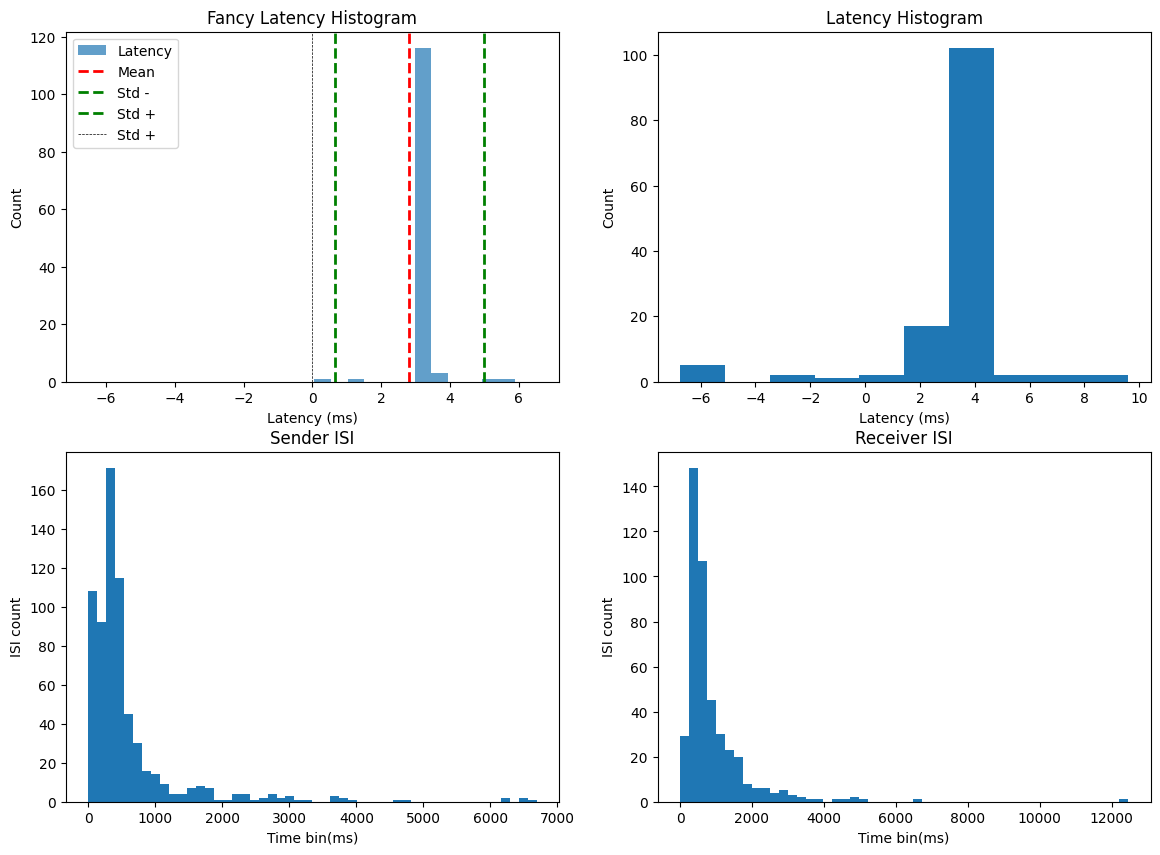

In [63]:
figs, plots = plt.subplots(nrows=2,ncols=2,figsize=(14,10))

mean_latency = np.mean(latencies)     # Get mean and SD
std_latency = np.std(latencies)
cutoff = 2 * std_latency           # remove outliers
lates_filtered = [latency for latency in latencies if abs(latency - mean_latency) <= cutoff]
plots[0,0].hist(lates_filtered, bins=12, alpha=0.7, label='Latency')
plots[0,0].axvline(mean_latency, color='red', linestyle='dashed', linewidth=2, label='Mean')
plots[0,0].axvline(mean_latency - std_latency, color='green', linestyle='dashed', linewidth=2, label='Std -')
plots[0,0].axvline(mean_latency + std_latency, color='green', linestyle='dashed', linewidth=2, label='Std +')
plots[0,0].axvline(0, color='black', linestyle='dashed', linewidth=0.5, label='Std +')
plots[0,0].set_xlim(-1*(abs(mean_latency)+cutoff), abs(mean_latency) + cutoff) 
plots[0,0].set_xlabel("Latency (ms)")
plots[0,0].set_ylabel("Count")
plots[0,0].set_title(f"Fancy Latency Histogram")
plots[0,0].legend()

plots[0,1].hist(latencies)
plots[0,1].set_title("Latency Histogram")
plots[0,1].set_xlabel("Latency (ms)")
plots[0,1].set_ylabel("Count")

plots[1,0].hist(isis[start_i], bins=50);
plots[1,0].set_title("Sender ISI")
plots[1,0].set_xlabel("Time bin(ms)")
plots[1,0].set_ylabel("ISI count")

plots[1,1].hist(isis[end_i], bins=50);
plots[1,1].set_title("Receiver ISI")
plots[1,1].set_xlabel("Time bin(ms)")
plots[1,1].set_ylabel("ISI count")



# Analyze individual arrows

# Analyze Subgroups spike rasters <font color="red"> - not done